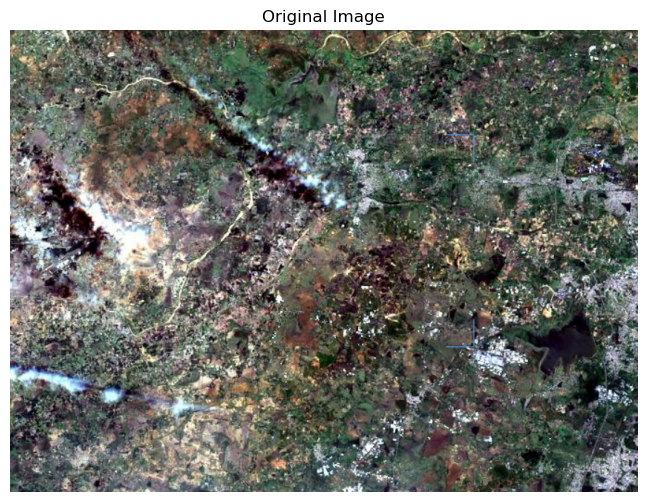

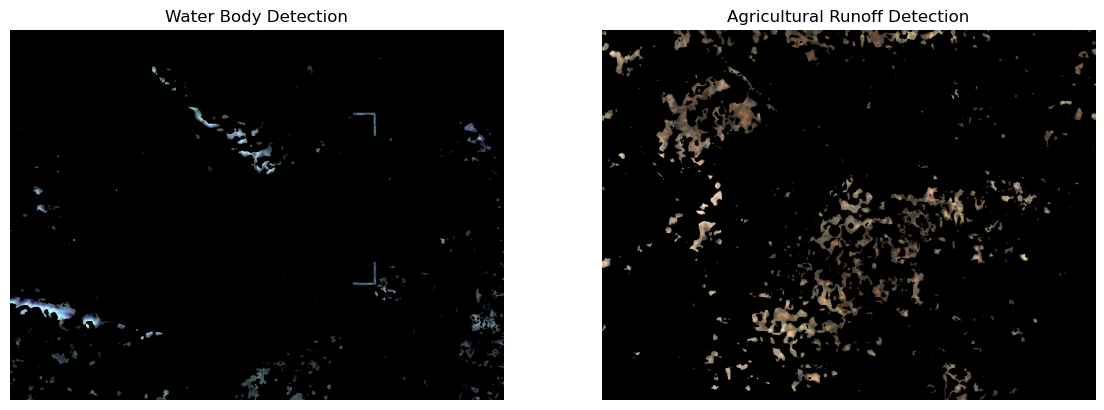

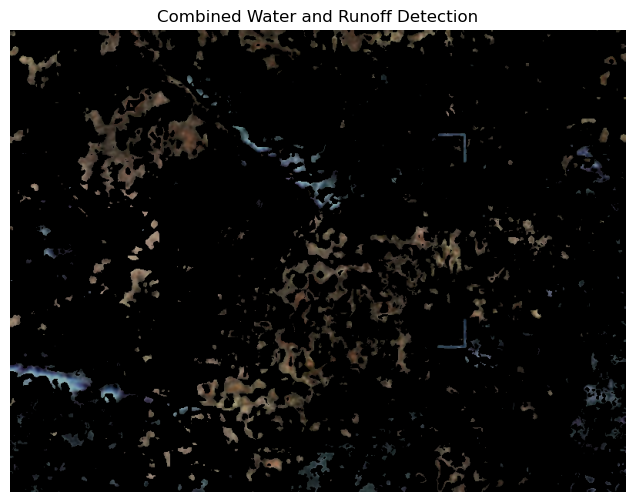

Detected runoff covers approximately 343.45% of the water body area.


In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image_path = 'original_image.png'  # Replace with your image file path
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)  # Convert to RGB for accurate color representation

# Display the original image
plt.figure(figsize=(10, 6))
plt.title("Original Image")
plt.imshow(image)
plt.axis('off')
plt.show()

# Preprocess Image (resize and smooth)
resized_image = cv2.resize(image, (800, 600))  # Resize for faster processing
blurred_image = cv2.GaussianBlur(resized_image, (5, 5), 0)  # Smooth image to remove noise

# Convert to HSV for color thresholding
hsv_image = cv2.cvtColor(blurred_image, cv2.COLOR_RGB2HSV)

# Define HSV range for detecting water bodies (blueish hue)
# Adjust the values depending on the water color in your images
lower_blue = np.array([90, 50, 50])
upper_blue = np.array([130, 255, 255])
water_mask = cv2.inRange(hsv_image, lower_blue, upper_blue)

# Segment out the water region
water_segment = cv2.bitwise_and(blurred_image, blurred_image, mask=water_mask)

# Detect runoff areas (e.g., brownish or reddish tones for sediment)
# Adjust the values depending on the runoff color in your images
lower_runoff = np.array([10, 50, 50])
upper_runoff = np.array([25, 255, 255])
runoff_mask = cv2.inRange(hsv_image, lower_runoff, upper_runoff)

# Segment out the runoff region
runoff_segment = cv2.bitwise_and(blurred_image, blurred_image, mask=runoff_mask)

# Combine water and runoff regions for better visualization
combined_mask = cv2.addWeighted(water_mask, 0.5, runoff_mask, 0.5, 0)
combined_segment = cv2.addWeighted(water_segment, 0.7, runoff_segment, 0.7, 0)

# Display segmented water and runoff areas
plt.figure(figsize=(14, 8))
plt.subplot(1, 2, 1)
plt.title("Water Body Detection")
plt.imshow(water_segment)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Agricultural Runoff Detection")
plt.imshow(runoff_segment)
plt.axis('off')

plt.show()

# Final result with combined detection
plt.figure(figsize=(10, 6))
plt.title("Combined Water and Runoff Detection")
plt.imshow(combined_segment)
plt.axis('off')
plt.show()

# Optionally: Calculate runoff area as a percentage of the water body area
water_area = cv2.countNonZero(water_mask)
runoff_area = cv2.countNonZero(runoff_mask)
if water_area > 0:
    runoff_percentage = (runoff_area / water_area) * 100
    print(f"Detected runoff covers approximately {runoff_percentage:.2f}% of the water body area.")
else:
    print("No water body detected in the image.")
